Training log: 1 epoch (128 / 60000 train. data). Loss: 2.3480305671691895
Training log: 1 epoch (1408 / 60000 train. data). Loss: 1.914429783821106
Training log: 1 epoch (2688 / 60000 train. data). Loss: 1.3926414251327515
Training log: 1 epoch (3968 / 60000 train. data). Loss: 1.099705457687378
Training log: 1 epoch (5248 / 60000 train. data). Loss: 0.8556616902351379
Training log: 1 epoch (6528 / 60000 train. data). Loss: 0.7307417988777161
Training log: 1 epoch (7808 / 60000 train. data). Loss: 0.7284115552902222
Training log: 1 epoch (9088 / 60000 train. data). Loss: 0.6479818224906921
Training log: 1 epoch (10368 / 60000 train. data). Loss: 0.4396750330924988
Training log: 1 epoch (11648 / 60000 train. data). Loss: 0.38291534781455994
Training log: 1 epoch (12928 / 60000 train. data). Loss: 0.5113890171051025
Training log: 1 epoch (14208 / 60000 train. data). Loss: 0.443009614944458
Training log: 1 epoch (15488 / 60000 train. data). Loss: 0.459974080324173
Training log: 1 epoch (1

Training log: 3 epoch (16768 / 60000 train. data). Loss: 0.16767005622386932
Training log: 3 epoch (18048 / 60000 train. data). Loss: 0.11880189925432205
Training log: 3 epoch (19328 / 60000 train. data). Loss: 0.14582517743110657
Training log: 3 epoch (20608 / 60000 train. data). Loss: 0.17308309674263
Training log: 3 epoch (21888 / 60000 train. data). Loss: 0.2856585681438446
Training log: 3 epoch (23168 / 60000 train. data). Loss: 0.20608848333358765
Training log: 3 epoch (24448 / 60000 train. data). Loss: 0.15300913155078888
Training log: 3 epoch (25728 / 60000 train. data). Loss: 0.19425341486930847
Training log: 3 epoch (27008 / 60000 train. data). Loss: 0.12143781036138535
Training log: 3 epoch (28288 / 60000 train. data). Loss: 0.22572825849056244
Training log: 3 epoch (29568 / 60000 train. data). Loss: 0.20962122082710266
Training log: 3 epoch (30848 / 60000 train. data). Loss: 0.13941006362438202
Training log: 3 epoch (32128 / 60000 train. data). Loss: 0.31206128001213074
Tra

Training log: 5 epoch (32128 / 60000 train. data). Loss: 0.14148876070976257
Training log: 5 epoch (33408 / 60000 train. data). Loss: 0.17136025428771973
Training log: 5 epoch (34688 / 60000 train. data). Loss: 0.13530950248241425
Training log: 5 epoch (35968 / 60000 train. data). Loss: 0.07509548962116241
Training log: 5 epoch (37248 / 60000 train. data). Loss: 0.13025395572185516
Training log: 5 epoch (38528 / 60000 train. data). Loss: 0.15704520046710968
Training log: 5 epoch (39808 / 60000 train. data). Loss: 0.14166653156280518
Training log: 5 epoch (41088 / 60000 train. data). Loss: 0.06637031584978104
Training log: 5 epoch (42368 / 60000 train. data). Loss: 0.10827790200710297
Training log: 5 epoch (43648 / 60000 train. data). Loss: 0.14310863614082336
Training log: 5 epoch (44928 / 60000 train. data). Loss: 0.1606624871492386
Training log: 5 epoch (46208 / 60000 train. data). Loss: 0.09633103758096695
Training log: 5 epoch (47488 / 60000 train. data). Loss: 0.1353752166032791
T

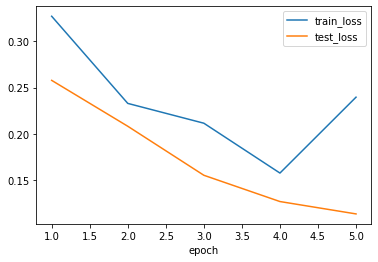

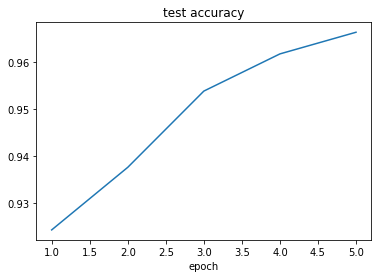

In [1]:
"""
引用元: 
 https://rightcode.co.jp/blog/information-technology/pytorch-mnist-learning
 2020.11.16

PyTorchでMNISTを学習させる

:summary   PyTorchで単純な多層パーセプトロンを構築してみる
:author    RightCode Inc. (https://rightcode.co.jp)
"""

import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, 1000)
        self.fc2 = torch.nn.Linear(1000, 10)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)

        return f.log_softmax(x, dim=1)


def load_MNIST(batch=128, intensity=1.0):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=True,
                       download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data',
                       train=False,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x * intensity)
                       ])),
        batch_size=batch,
        shuffle=True)

    return {'train': train_loader, 'test': test_loader}


if __name__ == '__main__':
    # 学習回数
    epoch = 5

    # 学習結果の保存用
    history = {
        'train_loss': [],
        'test_loss': [],
        'test_acc': [],
    }

    # ネットワークを構築
    net: torch.nn.Module = MyNet()

    # MNISTのデータローダーを取得
    loaders = load_MNIST()

    optimizer = torch.optim.Adam(params=net.parameters(), lr=0.001)

    for e in range(epoch):

        """ Training Part"""
        loss = None
        # 学習開始 (再開)
        net.train(True)  # 引数は省略可能
        for i, (data, target) in enumerate(loaders['train']):
            # 全結合のみのネットワークでは入力を1次元に
            # print(data.shape)  # torch.Size([128, 1, 28, 28])
            data = data.view(-1, 28*28)
            # print(data.shape)  # torch.Size([128, 784])

            optimizer.zero_grad()
            output = net(data)
            loss = f.nll_loss(output, target)
            loss.backward()
            optimizer.step()

            if i % 10 == 0:
                print('Training log: {} epoch ({} / 60000 train. data). Loss: {}'.format(e+1,
                                                                                         (i+1)*128,
                                                                                         loss.item())
                      )

        history['train_loss'].append(loss)

        """ Test Part """
        # 学習のストップ
        net.eval()  # または net.train(False) でも良い
        test_loss = 0
        correct = 0

        with torch.no_grad():
            for data, target in loaders['test']:
                data = data.view(-1, 28 * 28)
                output = net(data)
                test_loss += f.nll_loss(output, target, reduction='sum').item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        test_loss /= 10000

        print('Test loss (avg): {}, Accuracy: {}'.format(test_loss,
                                                         correct / 10000))

        history['test_loss'].append(test_loss)
        history['test_acc'].append(correct / 10000)

    # 結果の出力と描画
    print(history)
    plt.figure()
    plt.plot(range(1, epoch+1), history['train_loss'], label='train_loss')
    plt.plot(range(1, epoch+1), history['test_loss'], label='test_loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.savefig('loss.png')

    plt.figure()
    plt.plot(range(1, epoch+1), history['test_acc'])
    plt.title('test accuracy')
    plt.xlabel('epoch')
    plt.savefig('test_acc.png')


In [43]:
data, target in loaders['test']
print(target)
data.size()

tensor([9, 0, 7, 9, 4, 6, 9, 1, 7, 2, 1, 0, 7, 2, 2, 5])


torch.Size([16, 784])

In [27]:
torch.tensor([data[0].numpy()]).size()

torch.Size([1, 784])

In [45]:
net.forward(torch.tensor([data[1].numpy()]))

tensor([[ -0.1374, -14.1743,  -6.8071, -10.7585,  -4.5013,  -6.7676,  -2.1957,
          -9.5408,  -5.6417,  -9.6051]], grad_fn=<LogSoftmaxBackward>)

In [40]:
import numpy as np
torch.tensor([np.array([0.1,0.2], dtype=np.float32)])

torch.Size([1, 2])

In [46]:
myinput=torch.tensor([np.array([0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 0.87451 , 1.00000 , 1.00000 , 1.00000 , 0.87451 , 0.37647 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 0.87451 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.87451 , 0.37647 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 0.93725 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.96863 , 0.37647 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.90588 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.59216 , 0.00000 , 0.47059 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.96863 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.96863 , 1.00000 , 1.00000 , 0.59216 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.47059 , 1.00000 , 1.00000 , 1.00000 , 0.47059 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.47059 , 1.00000 , 0.59216 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.56078 , 1.00000 , 1.00000 , 0.96863 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.03137 , 1.00000 , 1.00000 , 1.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 1.00000 , 1.00000 , 1.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 1.00000 , 1.00000 , 1.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.37647 , 0.93725 , 1.00000 , 1.00000 , 1.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 0.87451 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.59216 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 0.87451 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.59216 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 0.87451 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.65490 , 0.03137 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 0.93725 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.59216 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.28235 , 0.87451 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.59216 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.90588 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.59216 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.96863 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.87451 , 0.37647 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.47059 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.96863 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.03137 , 0.62353 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 1.00000 , 0.59216 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000 , 0.00000  ],dtype=np.float32)])


In [47]:
net.forward(myinput)

tensor([[-1.4078e+01, -1.1437e+01, -1.7142e-03, -6.5075e+00, -2.0383e+01,
         -1.5364e+01, -1.9835e+01, -1.0208e+01, -8.6694e+00, -1.7886e+01]],
       grad_fn=<LogSoftmaxBackward>)